📧 Spam Email Classifier — Machine Learning Project
- 🧠 Introduction
In today’s digital world, unwanted messages — commonly known as spam — clutter inboxes, pose security threats, and waste time. To combat this, machine learning can automatically identify whether an incoming message is spam or ham (non-spam) based on its content.
This project demonstrates how to build a Spam Email/SMS Classifier using Natural Language Processing (NLP) and Machine Learning (ML) techniques. The goal is to train a model that can accurately detect spam messages from normal ones using text-based features.
- 🎯 Project Objective
The main objective of this project is to:
Analyze and understand the characteristics of spam vs. ham messages.
Preprocess and vectorize textual data using TF-IDF.
Train and evaluate machine learning models (e.g., Logistic Regression, Naive Bayes) to classify messages.
Measure model performance using metrics like accuracy, precision, recall, and F1-score.
(Optionally) Save and deploy the best-performing model.
- ⚙️ Key Steps
Import Libraries – Load essential Python libraries for data analysis, visualization, and ML modeling.
Load Dataset – Use the SMS Spam Collection Dataset.
Exploratory Data Analysis (EDA) – Explore dataset structure, detect imbalance, and visualize spam vs. ham distribution.
Data Preprocessing – Clean and transform raw text into numerical vectors using TF-IDF.
Model Training – Build and train models such as Logistic Regression and Naive Bayes.
Model Evaluation – Assess model performance using evaluation metrics and confusion matrix.
Model Comparison & Insights – Compare models and derive key observations.
Conclusion – Summarize outcomes and discuss potential improvements.
- 🧩 Expected Outcome
By the end of this project, you will:
Understand the complete ML workflow for text classification.
Gain hands-on experience with feature extraction using TF-IDF.
Build a high-accuracy spam classifier ready for deployment or integration into applications.

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [50]:
data = pd.read_csv("/Users/adityasingh/codes/week 8 project/spam_email_classifier_updated/data/spam.csv" , encoding='latin1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


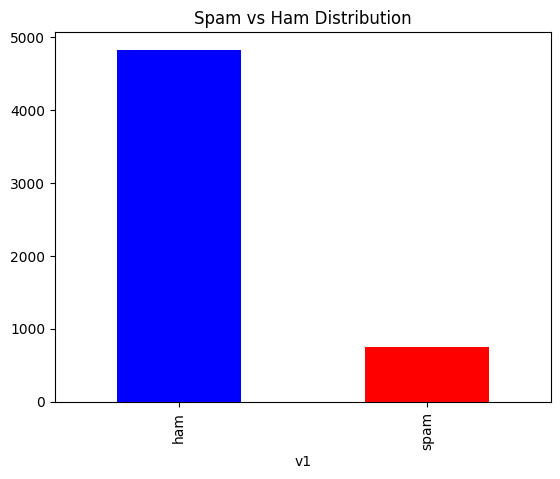

In [51]:
data['v1'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title("Spam vs Ham Distribution")
plt.show()


In [52]:
from sklearn.preprocessing import LabelEncoder
data['label_num'] = LabelEncoder().fit_transform(data['v1'])

print(data['label_num'])

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: label_num, Length: 5572, dtype: int64


In [53]:
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(data['v2']).toarray()
y = data['label_num']

print(X)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [58]:
X_train , X_test , y_train , y_test = train_test_split(X , y, test_size=0.2 , random_state=42)

In [59]:
model = LogisticRegression()
model.fit(X_train , y_train)
y_pred = model.predict(X_test)

"""model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
"""


'model = LogisticRegression()\nmodel.fit(X_train, y_train)\ny_pred = model.predict(X_test)\n'

Accuracy :  0.9641255605381166
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       0.99      0.74      0.85       150

    accuracy                           0.96      1115
   macro avg       0.98      0.87      0.91      1115
weighted avg       0.97      0.96      0.96      1115



<Axes: >

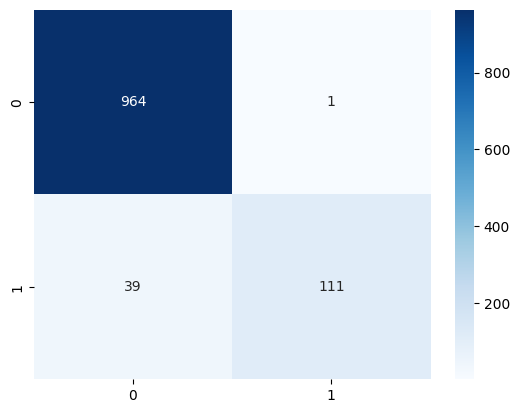

In [62]:
print('Accuracy : ' , accuracy_score(y_test , y_pred))
print(classification_report(y_test , y_pred))
sns.heatmap(confusion_matrix(y_test , y_pred) , annot=True , fmt='d' , cmap='Blues')

In [63]:
import joblib

joblib.dump(model , 'spam_classifier_model.pkl')

['spam_classifier_model.pkl']